Chloe Quinto    
CPE 695/WS  
HW2   
February 12, 2020   
I pledge my honor that I have abided by the Stevens Honor System - Chloe Quinto 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

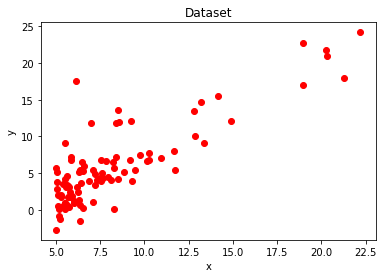

In [2]:
"""
In this problem, we write a program to find the coefficients for a linear regression model for the dataset
provided by (data2.txt). Assume a linear model: y = w0 + w1* x
"""


data = pd.read_csv("data2.txt", header = None)
x = np.array(data[0])
y = np.array(data[1])

plt.scatter(x,y,color='red')
plt.title("Dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

---

### Calculate the Normal Equation 

<img src="images/normalEquation.png">

In [3]:
def normal_equation(x,y):
    m = len(x)
    x_bias = np.c_[np.ones((m, 1)), x] 
    
    left_equation = np.linalg.inv(x_bias.T.dot(x_bias))
    right_equation = (x_bias.T).dot(y)
    
    theta = left_equation.dot(right_equation)
    return theta

In [4]:
a, b = normal_equation(x,y)

print("Normal Equation")
print("y = " + str(a) + " + " + str(b) + "*x")

y = a+b*x 

Normal Equation
y = -3.8957808783119106 + 1.1930336441895983*x


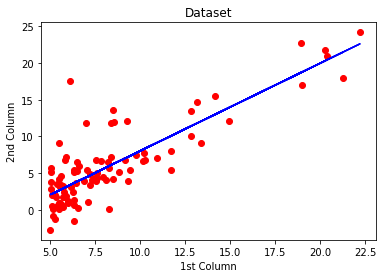

In [5]:
x_original = np.array(data[0])
y_original = np.array(data[1])


plt.scatter(x_original, y_original, color="red")
plt.plot(x,y,color='blue') 
plt.xlim(4.5)
plt.title("Dataset")
plt.xlabel("1st Column")
plt.ylabel("2nd Column")
plt.show()

---

###  Now we need to find Gradient Descent Using Batch and Stochastic Modes 

In [6]:
def cost_function(x, y, theta):
    #calculates the MSE cost function 
    num_samples = len(x) 
    cost_sum = 0.0
    for a,b in zip(x, y):
        feature_vector = np.array([1.0,a])
        cost_sum += (np.dot(theta, feature_vector) - b) ** 2 # (θ^T*x -y)^2
    cost = cost_sum / (num_samples * 2.0) # (1/m)Σ(θ^T*x -y)^2
    
    return cost

Batch Gradient Descent 
<img src = "./images/gradient_equation.png">

In [7]:
def batch_gradient_descent(x, y, theta, alpha, max_iter, show):
    # calculates the batch gradient descent 
    
    iteration,m = 0,len(x)
    cost = np.zeros(max_iter)
    equation = np.zeros([2, max_iter])
    
    for i in range(1,max_iter):
        cost[iteration] = cost_function(x, y, theta)
        equation[:, iteration] = theta
        
        if (show == "yes"):
            print("iteration: " + str(iteration) + " cost: " + str(cost[iteration]))

        
        for a,b in zip(x, y):
         
            feature_vector = np.array([1.0, a]) #red part of the equation
            y_hat = np.dot(theta, np.array([1.0, a])) #green part of the equation
            gradient = feature_vector * (b - y_hat) #yellow part of the equation
            theta += alpha * gradient/m  
            
        iteration += 1
    
    return theta, cost, equation



We need to split our data into training and testing 

We can use the function train_test_split() to split our data and specify the test size to 20% of the data 

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20)

In [9]:
'''
Batch Gradient Descent
'''
theta = np.array([20.0, 80.0])
alpha_batch = 0.01
max_iterations = 100

batch_equation, cost_batch, params_store_batch = batch_gradient_descent(x_train, y_train, theta, alpha_batch, max_iterations, "yes")


iteration: 0 cost: 273620.0118252553
iteration: 1 cost: 50044.13912588621
iteration: 2 cost: 9179.130307833977
iteration: 3 cost: 1703.8827139585662
iteration: 4 cost: 333.8878719026365
iteration: 5 cost: 81.67331600227376
iteration: 6 cost: 34.72425885994374
iteration: 7 cost: 25.732083653078593
iteration: 8 cost: 23.87030605511208
iteration: 9 cost: 23.395152209993746
iteration: 10 cost: 23.20933261942019
iteration: 11 cost: 23.09189749261104
iteration: 12 cost: 22.993737060859242
iteration: 13 cost: 22.902147731136413
iteration: 14 cost: 22.813216029090903
iteration: 15 cost: 22.725546976420336
iteration: 16 cost: 22.638595038131136
iteration: 17 cost: 22.552135956492975
iteration: 18 cost: 22.46607502331495
iteration: 19 cost: 22.38037142595928
iteration: 20 cost: 22.295007095064395
iteration: 21 cost: 22.20997362016167
iteration: 22 cost: 22.12526670547015
iteration: 23 cost: 22.040883811648158
iteration: 24 cost: 21.956823151040716
iteration: 25 cost: 21.873083259285803
iteration

Stochastic Gradient Descent

Randomize the whole training set. Then, for the update of every parameter, we use only one training example in every iteration

<img src = "./images/gradient_equation.png">

In [10]:
def stochastic_gradient_descent(input_var, output_var, params, alpha, show):
    # calculates the stochastic gradient descent 
    num_samples = len(input_var)
    cost = np.zeros(num_samples)
    equation = np.zeros([2, num_samples])
    
    iteration = 0
    for x,y in zip(input_var, output_var):
        cost[iteration] = cost_function(input_var, output_var, params)
        equation[:, iteration] = params
        
        if (show == "yes"):
            print("iteration: " + str(iteration) + " cost: " + str(cost[iteration]))
        
        y_hat = np.dot(params, np.array([1.0, x]))
        gradient = np.array([1.0, x]) * (y - y_hat)
        params += alpha * gradient/num_samples
        
        iteration += 1
            
    return params, cost, equation

In [11]:
'''
Stochastic Gradient Descent
'''

alpha_stoch = 0.01
theta = np.array([20.0, 80.0])
stoch_equation, cost, params_store = stochastic_gradient_descent(x_train, y_train, theta, alpha_stoch, "yes")


iteration: 0 cost: 273620.0118252553
iteration: 1 cost: 269194.59386098396
iteration: 2 cost: 264413.15163952
iteration: 3 cost: 262594.11056607676
iteration: 4 cost: 260757.52499661813
iteration: 5 cost: 257292.29689501406
iteration: 6 cost: 230830.42092390868
iteration: 7 cost: 227535.44502131824
iteration: 8 cost: 224052.87480151214
iteration: 9 cost: 218817.6211191724
iteration: 10 cost: 217064.361608505
iteration: 11 cost: 215273.37940075723
iteration: 12 cost: 213273.90376417298
iteration: 13 cost: 210828.66827545068
iteration: 14 cost: 207704.51538367354
iteration: 15 cost: 198144.77764812243
iteration: 16 cost: 189760.87924972837
iteration: 17 cost: 187706.67321533518
iteration: 18 cost: 186396.97343985108
iteration: 19 cost: 184651.80108035475
iteration: 20 cost: 182552.89045529495
iteration: 21 cost: 176095.9520095543
iteration: 22 cost: 173166.90302164486
iteration: 23 cost: 171899.9531447044
iteration: 24 cost: 170082.45902335088
iteration: 25 cost: 167594.21586513042
itera

### Discussion


1. Determine an appropriate termination condition (e.g. when the cost function is less than a threshold and/or given number of iterations 
    * An appropriate termination condition is when the cost function is minimized or 0
    * I set the number of iterations to be a 100 
    
---
2. Print the cost function vs. iterations for each mode. Compare and discuss batch and stochastic modes in terms of the accuracy and the speed of convergence. 
    * It looks like the batch gradient descent is more accurate than the stochastic gradient descent. But let's look at the RMS ***(check below)*** 
    * After checking the RMS, it looks like the Batch RMS is lower therefore more accurate. 
    * Let's check for convergence ***(check below)***
    * It looks like Batch Gradient Descent converges faster than Stochastic Gradient Descent 

---
3. Choose the best learning rate. For example, you can plot cost function vs. learning rate to determine the best learning rate. 
    * It looks like 0.1 is the best learning rate for both since it converges faster to the minimum ***(check below)*** 
    * You can run the notebook again with 0.1 as alpha and you would see that it is the best learning rate 


In [12]:
rms_batch = np.sqrt(np.mean(np.square(batch_equation[0] + batch_equation[1]*x_test - y_test)))
rms_stochastic = np.sqrt(np.mean(np.square(stoch_equation[0] + stoch_equation[1]*x_test - y_test)))
print("Batch RMS: " + str(rms_batch))
print("Stochastic RMS: " + str(rms_stochastic))

Batch RMS: 5.112271497596551
Stochastic RMS: 302.0903356145289


Therefore, the batch gradient descent is more accurate. 

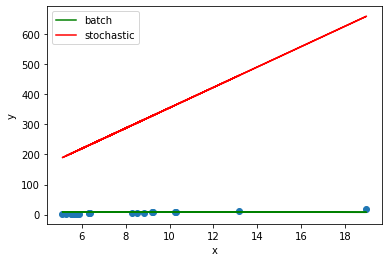

In [13]:
plt.scatter(x_test, y_test)
plt.plot(x_test, batch_equation[0] + batch_equation[1]*x_test, color = 'green', label='batch')
plt.plot(x_test, stoch_equation[0] + stoch_equation[1]*x_test, color ='red', label='stochastic')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Next let's find which gradient descent converges faster

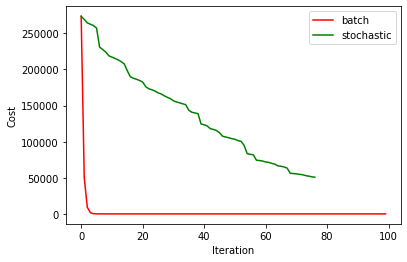

In [14]:
plt.plot(np.arange(max_iterations), cost_batch, color = 'red', label='batch')
plt.plot(np.arange(len(cost)), cost, color = 'green', label='stochastic')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [15]:
print("Batch Gradient Descent: " +  str(np.min(cost_batch)))
print("Stochastic Gradient Descent: " +  str(np.min(cost)))

Batch Gradient Descent: 0.0
Stochastic Gradient Descent: 50814.929816915705


It looks like batch gradient descent does converge faster than stochastic gradient descent 

In [16]:
theta = np.array([20.0, 80.0])
max_iterations = 100

alpha_batch = [0.03, 0.01, 0.3, 0.1]
res_cost_batch,res_cost_stoch = [],[]

for i in alpha_batch: 
    batch_equation, cost_batch, params_store_batch = batch_gradient_descent(x_train, y_train, theta, i, max_iterations, "no")
    stoch_equation, cost_stoch, params_store = stochastic_gradient_descent(x_train, y_train, theta, alpha_stoch, "no")
    res_cost_batch.append(cost_batch)
    res_cost_stoch.append(cost_stoch)
    
    

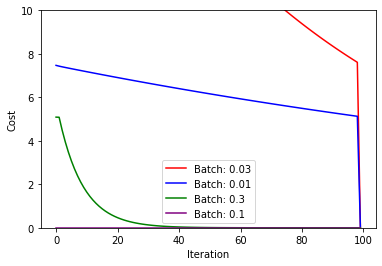

In [17]:
# plot batch learning rate 
plt.plot(np.arange(max_iterations), res_cost_batch[0], color = 'red', label='Batch: 0.03')
plt.plot(np.arange(max_iterations), res_cost_batch[1], color ='blue', label='Batch: 0.01')
plt.plot(np.arange(max_iterations), res_cost_batch[2], color ='green', label='Batch: 0.3')
plt.plot(np.arange(max_iterations), res_cost_batch[3], color ='purple', label='Batch: 0.1')

plt.ylim(0,10 )

plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.show()

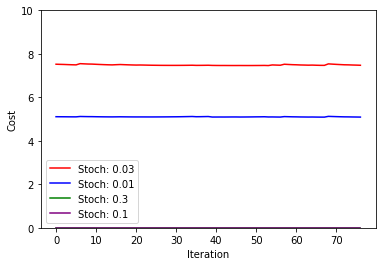

In [18]:
# Plot stochastic learning rate 
plt.plot(np.arange(len(cost)), res_cost_stoch[0], color ='red', label='Stoch: 0.03')
plt.plot(np.arange(len(cost)), res_cost_stoch[1], color ='blue', label='Stoch: 0.01')
plt.plot(np.arange(len(cost)), res_cost_stoch[2], color ='green', label='Stoch: 0.3')
plt.plot(np.arange(len(cost)), res_cost_stoch[3], color ='purple', label='Stoch: 0.1')


plt.ylim(0,10) 

plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.show()

It looks like 0.1 is the best learning rate for both models 